# Sales Analysis

#### We will be analyzing 1 year worth of sales data to answer business questions such as:
    1. What is the best month for sales? How much was earned that month?
    2. What city had the highest number of sales?
    3. What time should we display advertisements to maximize probability of customers
    buying product?
    4. What products are most often sold together?
    5. What product sold the most? Why?

Import Necessary Libraries & Format File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from itertools import combinations
from collections import Counter

combined_data = pd.DataFrame()
files = [file for file in os.listdir("SalesAnalysis/Sales_data")]

for file in files:
    df = pd.read_csv("SalesAnalysis/Sales_data/"+file)
    combined_data = pd.concat([combined_data, df])

warnings.filterwarnings('ignore')

### Data cleaning/formatting

Adding month column

In [2]:
combined_data = combined_data.dropna(how='all')
combined_data = combined_data[combined_data["Order Date"].str[0:2] != "Or"]
combined_data["Month"] = combined_data["Order Date"].str[0:2].astype("int32")

Adding sales column

In [3]:
combined_data["Quantity Ordered"] = pd.to_numeric(combined_data["Quantity Ordered"])
combined_data["Price Each"] = pd.to_numeric(combined_data["Price Each"])
combined_data["Sales"] = combined_data["Quantity Ordered"] * combined_data["Price Each"]

Adding city column

In [4]:
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]
combined_data["City"] = combined_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x)+")")

Reformat order date

In [5]:
combined_data["Order Date"] = pd.to_datetime(combined_data["Order Date"])
combined_data["Hour"] = combined_data["Order Date"].dt.hour
combined_data["Minute"] = combined_data["Order Date"].dt.minute

### Question 1

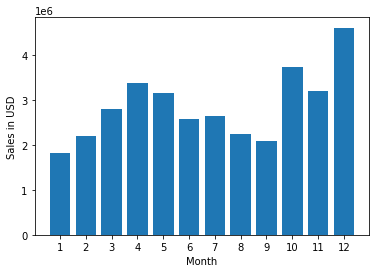

In [6]:
results = combined_data.groupby("Month").sum()
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month")
plt.show()

### Question 2

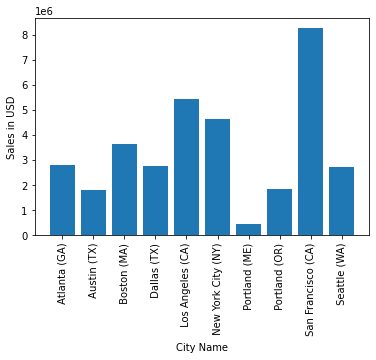

In [7]:
results = combined_data.groupby("City").sum()
cities = [city for city, df in combined_data.groupby("City")]
plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation = "vertical")
plt.ylabel("Sales in USD")
plt.xlabel("City Name")
plt.show()

### Question 3

<function matplotlib.pyplot.show(close=None, block=None)>

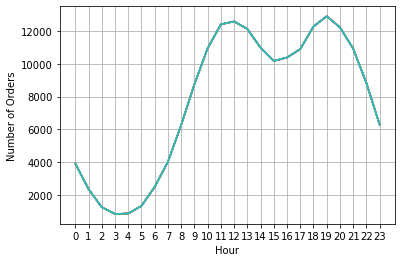

In [8]:
hours = [hour for hour, df in combined_data.groupby("Hour")]
plt.plot(hours,combined_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show

By the chart above, we can observe that the highest orders came in during 1PM and 7PM. A potential assumption from this chart is that advertising little bit prior to the peak order time will increase the probability of customers buying product. However, because there are more unknowns a better solution would be to try out different advertisement time from a sample and compare the results.

### Question 4

In [11]:
df = combined_data[combined_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5

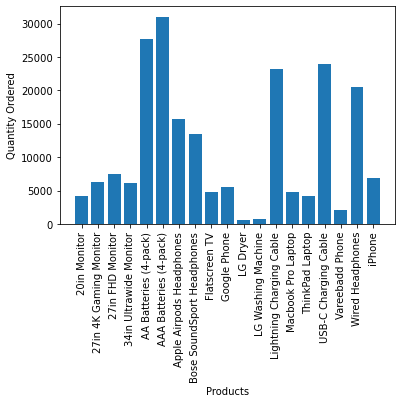

In [16]:
product_group = combined_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation = "vertical")
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()

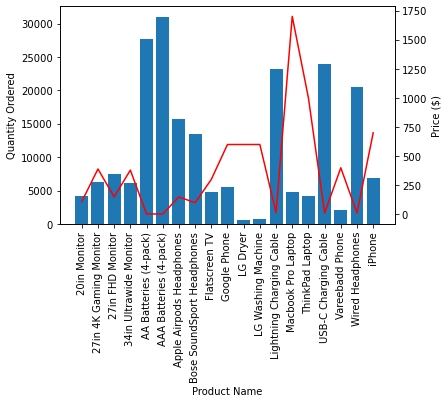

In [19]:
prices = combined_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products, prices, 'r-')

ax1.set_xticklabels(products, rotation = "vertical")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price ($)")

plt.show()